# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset

####################################################
dataset="bct_del"
ncelltype=3
####################################################

read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")


# scDML(reassign)

In [2]:
method="scDML"
args_integrated=read_dir+method+"/"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ARI= adjusted_rand_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
print("ARI={}".format(ARI))
print("NMI={}".format(NMI))
results = {
'ARI': np.round(ARI,3),
'NMI': np.round(NMI,3),
'ASW_label': "--",
'ASW_label/batch': "--",
#'kBET': kBET_value[0],
 'BatchKL':"--",
 'cLISI':"--",  
 'iLISI':"--"
}
print("....................................... calculate all metric done .................................")
scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
scDML_reassign.columns=[method+"(reassign)"]
scDML_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")
#scDML_reassign


AnnData object with n_obs × n_vars = 7251 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
ARI=0.977020718186033
NMI=0.941424217994624
....................................... calculate all metric done .................................


# scDML(louvain)

AnnData object with n_obs × n_vars = 7251 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
...................................................................................................
..........................................method=scDML.............................................
..............................calculate ari nmi according to nceltype=3...........................
louvain clustering result(resolution=0.1220703125):n_cluster=3
ARI: 0.977020718186033
NMI: 0.941424217994624
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.6203743

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.8195136027508387
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.9187739193439484
ASW_label/batch= 0.7953087051494825
...............................

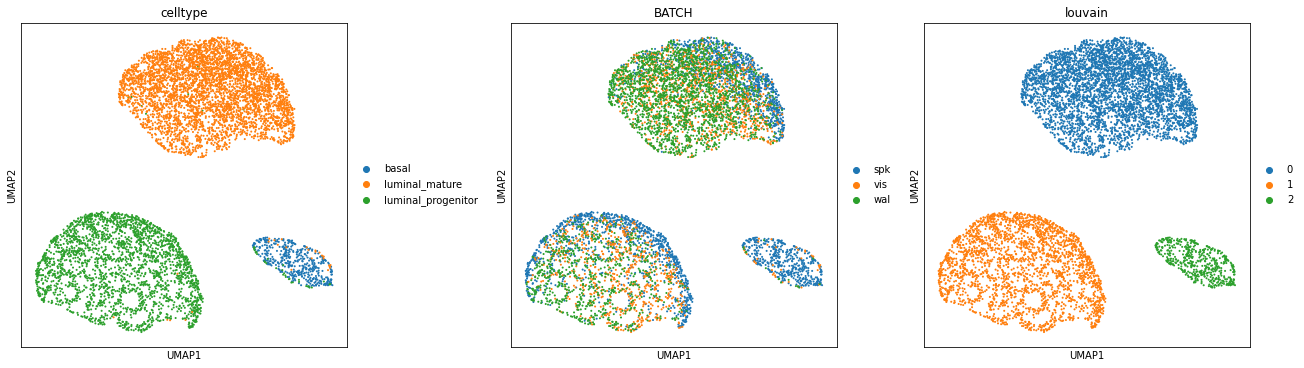

                 scDML(louvain)
ARI                       0.977
NMI                       0.941
ASW_label                 0.919
ASW_label/batch           0.795
BatchKL                   0.620
cLISI                     1.000
iLISI                     1.820


In [3]:
method="scDML"
args_integrated=read_dir+method+"/"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype","louvain"])#
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scDML3_eva.columns=[method+"(louvain)"] ## modify column names
scDML3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
print(scDML3_eva)

adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# fastMNN

AnnData object with n_obs × n_vars = 7251 × 1222
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_originalexp', 'nFeature_originalexp', 'study', 'cell.class', 'library_size', 'detected_genes', 'BATCH', 'celltype', 'cellname', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
    var: 'features', 'mnn.reconstructed_features'
    uns: 'neighbors'
    obsm: 'X_mnn', 'X_umap'
    varm: 'MNN'
    layers: 'mnn.reconstructed'
    obsp: 'distances'
AnnData object with n_obs × n_vars = 7251 × 50
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_originalexp', 'nFeature_originalexp', 'study', 'cell.class', 'library_size', 'detected_genes', 'BATCH', 'celltype', 'cellname', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
...................................................................................................
..........................................method=fastMNN.............................................
..............................calculate ari nmi according to nc

... storing 'study' as categorical
... storing 'cell.class' as categorical
... storing 'BATCH' as categorical
... storing 'celltype' as categorical
... storing 'ident' as categorical


ASW_label= 0.6804409474134445
ASW_label/batch= 0.8733050237584453
....................................... calculate all metric done .................................


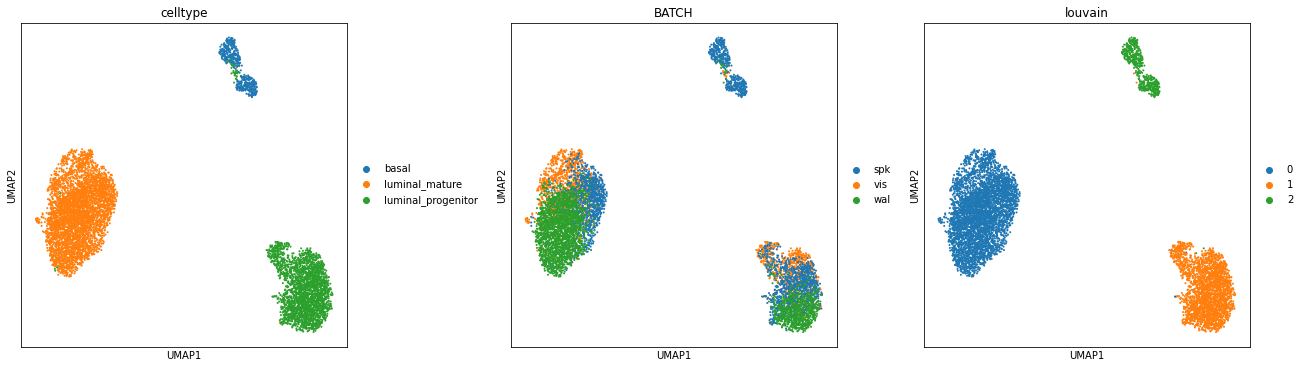

                 fastMNN
ARI                0.986
NMI                0.962
ASW_label          0.680
ASW_label/batch    0.873
BatchKL            0.901
cLISI              1.000
iLISI              1.270


In [4]:
method="fastMNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

adata_fastMNN=sc.read_h5ad(args_integrated)
print(adata_fastMNN)

adata_mnn=sc.AnnData(adata_fastMNN.obsm["X_mnn"])
adata_mnn.obs=adata_fastMNN.obs.copy()
print(adata_mnn)
# sc.tl.pca(adata_mnn)
# sc.pp.neighbors(adata_mnn)
# sc.tl.umap(adata_mnn)
# sc.pl.umap(adata_mnn,color=["BATCH","celltype"])
########################################################
adata_integrated=adata_mnn.copy()
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,fastMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

fastMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(fastMNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# harmony

AnnData object with n_obs × n_vars = 7251 × 1222
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_originalexp', 'nFeature_originalexp', 'study', 'cell.class', 'library_size', 'detected_genes', 'BATCH', 'celltype', 'cellname', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 7251 × 30
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_originalexp', 'nFeature_originalexp', 'study', 'cell.class', 'library_size', 'detected_genes', 'BATCH', 'celltype', 'cellname', 'ident'
...................................................................................................
..........................................method=harmony.............................................
..............................calculate 

... storing 'study' as categorical
... storing 'cell.class' as categorical
... storing 'BATCH' as categorical
... storing 'celltype' as categorical


ASW_label= 0.699810191988945
ASW_label/batch= 0.9607813226930079
....................................... calculate all metric done .................................


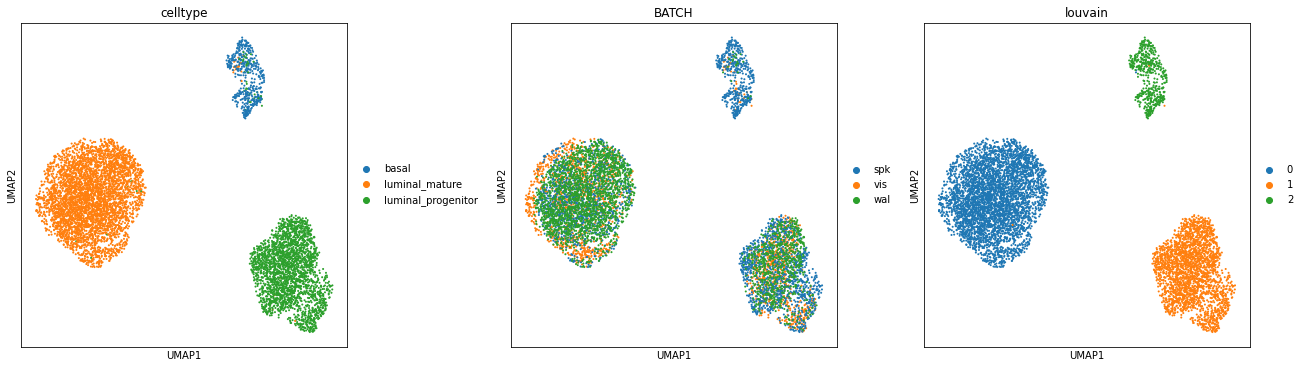

                 harmony
ARI                0.979
NMI                0.945
ASW_label          0.700
ASW_label/batch    0.961
BatchKL            0.647
cLISI              1.000
iLISI              1.773


In [5]:
method="harmony"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_harmony=sc.AnnData(adata_integrated.obsm["X_harmony"])
adata_harmony.obs=adata_integrated.obs.copy()
print(adata_harmony)
# sc.tl.pca(adata_harmony)
# sc.pp.neighbors(adata_harmony)
# sc.tl.umap(adata_harmony)
# sc.pl.umap(adata_harmony,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_harmony.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,harmony_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

harmony_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(harmony_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Seurat3

AnnData object with n_obs × n_vars = 7251 × 1222
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_originalexp', 'nFeature_originalexp', 'study', 'cell.class', 'library_size', 'detected_genes', 'BATCH', 'celltype', 'cellname', 'ident'
    var: 'features', 'RNA_features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'RNA'
...................................................................................................
..........................................method=Seurat3.............................................
..............................calculate ari nmi according to nceltype=3...........................
louvain clustering result(resolution=0.244140625):n_cluster=3
ARI: 0.9897588309495217
NMI: 0.9699324929018602
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.5996659

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.7

... storing 'study' as categorical
... storing 'cell.class' as categorical
... storing 'BATCH' as categorical
... storing 'celltype' as categorical
... storing 'ident' as categorical


ASW_label= 0.6936877220869064
ASW_label/batch= 0.9324331595070495
....................................... calculate all metric done .................................


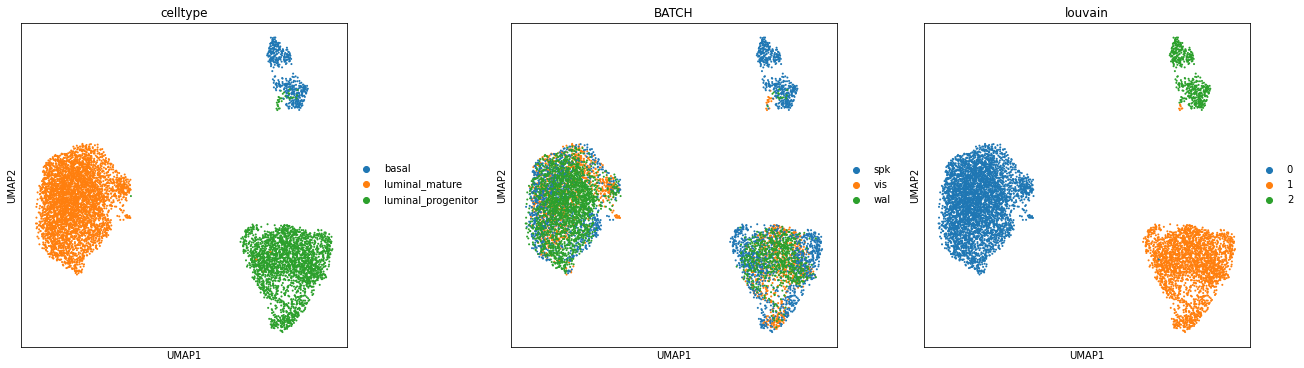

                 Seurat3
ARI                0.990
NMI                0.970
ASW_label          0.694
ASW_label/batch    0.932
BatchKL            0.600
cLISI              1.000
iLISI              1.753


In [6]:
###################################################################
method="Seurat3"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
sc.tl.pca(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,Seurat3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

Seurat3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(Seurat3_eva)

adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama

AnnData object with n_obs × n_vars = 7251 × 1000
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=scanorama.............................................
..............................calculate ari nmi according to nceltype=3...........................
louvain clustering result(resolution=0.1220703125):n_cluster=3
ARI: 0.9900774935999297
NMI: 0.9719074273393543
.................................. calculate BatchKL  .............................................
BatchKL= [1] 1.194987

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.0562369145782382
..................................        calculate ASW      ................................

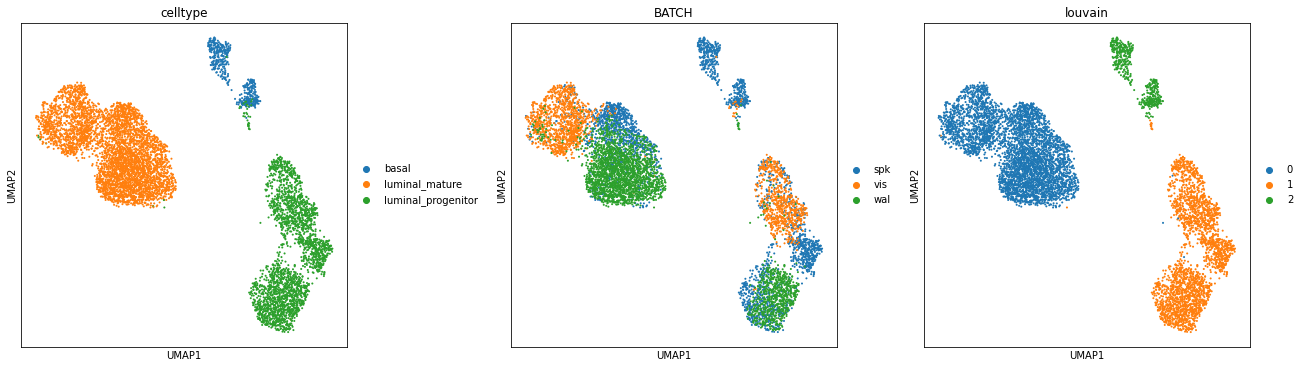

                 scanorama
ARI                  0.990
NMI                  0.972
ASW_label            0.698
ASW_label/batch      0.842
BatchKL              1.195
cLISI                1.000
iLISI                1.056


In [7]:
###################################################################
method="scanorama"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()

adata_integrated,scanorama_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

scanorama_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scanorama_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# INSCT

AnnData object with n_obs × n_vars = 7251 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=INSCT.............................................
..............................calculate ari nmi according to nceltype=3...........................
louvain clustering result(resolution=0.030517578125):n_cluster=3
ARI: 0.9886117354146792
NMI: 0.9662440172476635
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.7813122

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.6074881664091487
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.7324201315641403
ASW_label/batch= 0.7269464207311176
.....

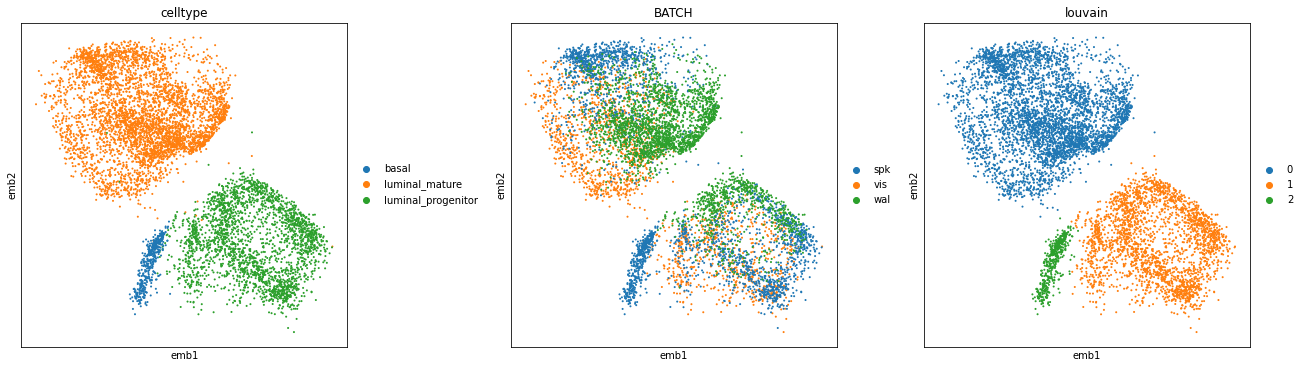

                 INSCT
ARI              0.989
NMI              0.966
ASW_label        0.732
ASW_label/batch  0.727
BatchKL          0.781
cLISI            1.000
iLISI            1.607


In [8]:
method="INSCT"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,INSCT_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

INSCT_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(INSCT_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BBKNN

AnnData object with n_obs × n_vars = 7251 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=BBKNN.............................................
..............................calculate ari nmi according to nceltype=3...........................
louvain clustering result(resolution=0.030517578125):n_cluster=3
ARI: 0.985380105950495
NMI: 0.9564448324848628
.................................. calculate BatchKL  .............................................
BatchKL= [1] 1.026217

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.2276971628832707
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.7786998152732849
ASW_label/batch= 0.6630008481266767
.......

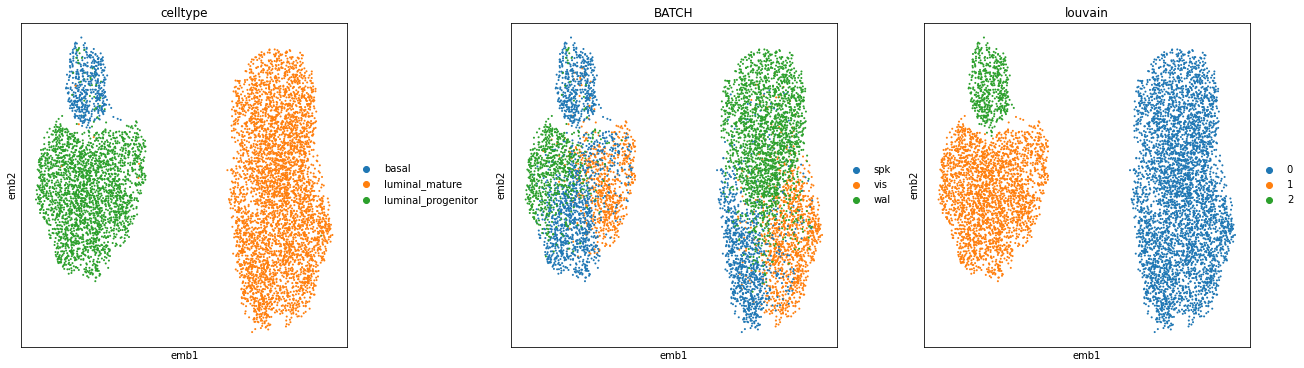

                 BBKNN
ARI              0.985
NMI              0.956
ASW_label        0.779
ASW_label/batch  0.663
BatchKL          1.026
cLISI            1.000
iLISI            1.228


In [9]:
method="BBKNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,BBKNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

BBKNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(BBKNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Liger

AnnData object with n_obs × n_vars = 7251 × 1222
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_originalexp', 'nFeature_originalexp', 'study', 'cell.class', 'library_size', 'detected_genes', 'BATCH', 'celltype', 'cellname', 'ident', 'clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_iNMF', 'X_iNMF_raw', 'X_umap'
    varm: 'INMF_RAW'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 7251 × 20
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_originalexp', 'nFeature_originalexp', 'study', 'cell.class', 'library_size', 'detected_genes', 'BATCH', 'celltype', 'cellname', 'ident', 'clusters'
...................................................................................................
..........................................method=liger.............................................
......................

... storing 'study' as categorical


ASW_label= 0.6696264147758484
ASW_label/batch= 0.9521999703736274
....................................... calculate all metric done .................................


... storing 'cell.class' as categorical
... storing 'BATCH' as categorical
... storing 'celltype' as categorical


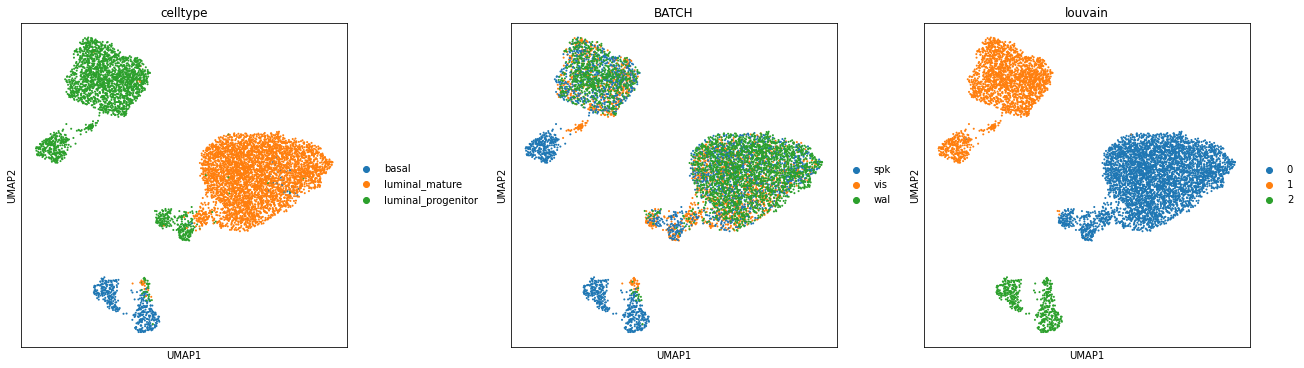

                 liger
ARI              0.838
NMI              0.775
ASW_label        0.670
ASW_label/batch  0.952
BatchKL          0.410
cLISI            1.000
iLISI            2.197


In [10]:
method="liger"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_liger=sc.AnnData(adata_integrated.obsm["X_iNMF"])
adata_liger.obs=adata_integrated.obs.copy()
print(adata_liger)
# sc.tl.pca(adata_liger)
# sc.pp.neighbors(adata_liger)
# sc.tl.umap(adata_liger)
# sc.pl.umap(adata_liger,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_liger.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,liger_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

liger_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(liger_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BERMUDA

../evaluation/bct_del/BERMUDA/bct_del_BERMUDA_corrected.h5ad
AnnData object with n_obs × n_vars = 7251 × 20
    obs: 'celltype', 'BATCH'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_umap'
...................................................................................................
..........................................method=BERMUDA.............................................
..............................calculate ari nmi according to nceltype=3...........................
louvain clustering result(resolution=0.48828125):n_cluster=3
ARI: 0.9694204662475197
NMI: 0.9288272246069192
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.4763188

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 2.0997972277600034
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label=

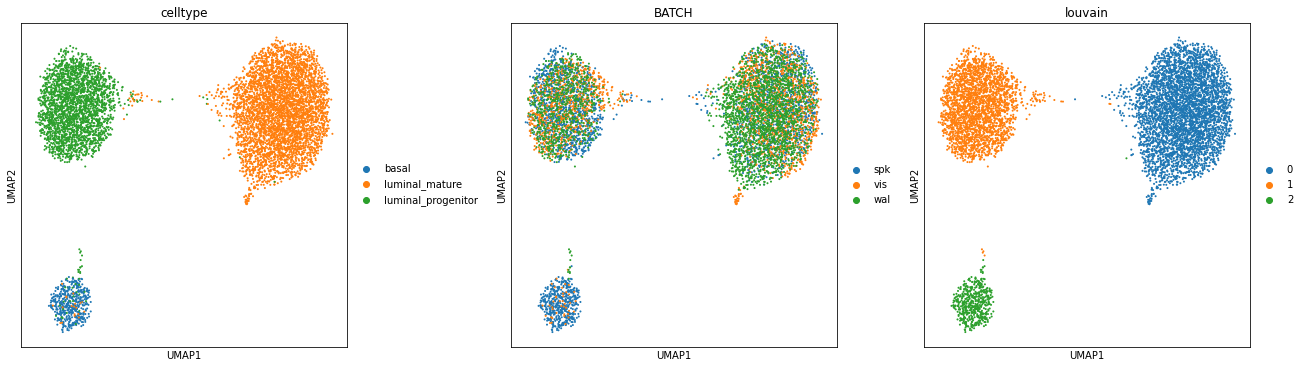

                 BERMUDA
ARI                0.969
NMI                0.929
ASW_label          0.737
ASW_label/batch    0.921
BatchKL            0.476
cLISI              1.000
iLISI              2.100


In [11]:
method="BERMUDA"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
if(os.path.exists(args_integrated)):
    print(args_integrated)
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
    # sc.tl.pca(adata_integrated)
    # sc.pp.neighbors(adata_integrated)
    # sc.tl.umap(adata_integrated)
    # sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,bermuda_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(bermuda_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
else:
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()    
    results = {
    'ARI': "--",
    'NMI': "--",
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    bermuda_eva = pd.DataFrame.from_dict(results, orient='index')
    bermuda_eva.columns=[method]
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    bermuda_eva
    #scDML_reassign

# scVI

AnnData object with n_obs × n_vars = 7251 × 10
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=scVI.............................................
..............................calculate ari nmi according to nceltype=3...........................
louvain clustering result(resolution=0.244140625):n_cluster=3
ARI: 0.9739696669751117
NMI: 0.9345759400189133
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.7171105

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 1.676359176486349
..................................        calculate ASW      ......................................
S

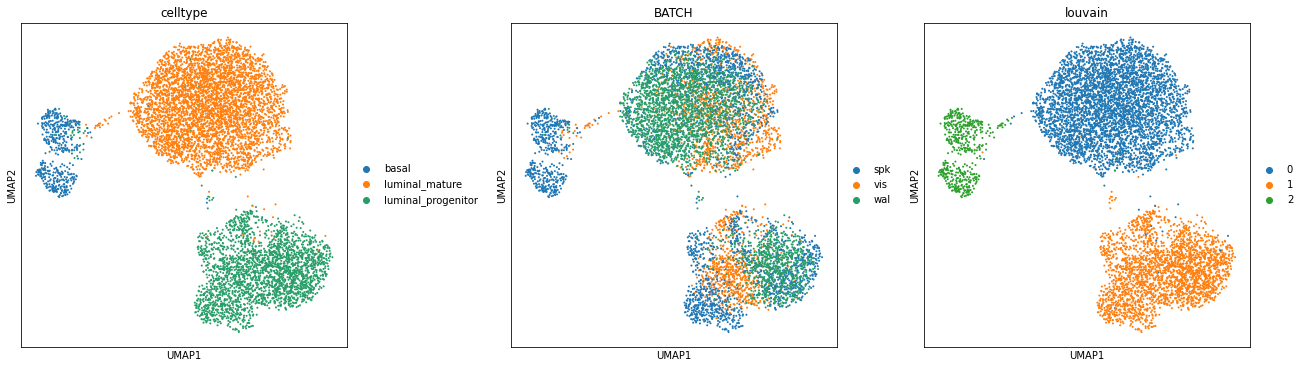

                  scVI
ARI              0.974
NMI              0.935
ASW_label        0.582
ASW_label/batch  0.929
BatchKL          0.717
cLISI            1.000
iLISI            1.676


In [12]:
method="scVI"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,scVI_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scVI_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scVI_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# summary evaluation of all method to  table

In [13]:
#method_list=["tDCA","fastMNN","harmony","Seurat3","scanorama","INSCT","scVI","BBKNN","liger"]
method_list=["scDML","fastMNN","harmony","Seurat3","scanorama","INSCT","BBKNN","liger","BERMUDA","scVI"]

df_ls=[]
for method in method_list:
    print(method)
    if(method=="scDML"):
        method_eva1=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
        df_ls.append(method_eva1)
        method_eva2=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
        df_ls.append(method_eva2)
    else:
        method_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
        df_ls.append(method_eva)

result = pd.concat(df_ls, join='outer', axis=1)
result.columns=["scDML(reassign)","scDML(louvain)"]+method_list[1:]
result.index.name=dataset ## add title for column names 
#result=result.round(3) ## only save 3 precision of float
result.to_csv(save_dir+dataset+"_evaluation.csv")
result
#liger

scDML
fastMNN
harmony
Seurat3
scanorama
INSCT
BBKNN
liger
BERMUDA
scVI


,scDML(reassign),scDML(louvain),fastMNN,harmony,Seurat3,scanorama,INSCT,BBKNN,liger,BERMUDA,scVI
bct_del,,,,,,,,,,,
ARI,0.977,0.977,0.986,0.979,0.990,0.990,0.989,0.985,0.838,0.969,0.974
NMI,0.941,0.941,0.962,0.945,0.970,0.972,0.966,0.956,0.775,0.929,0.935
ASW_label,--,0.919,0.680,0.700,0.694,0.698,0.732,0.779,0.670,0.737,0.582
ASW_label/batch,--,0.795,0.873,0.961,0.932,0.842,0.727,0.663,0.952,0.921,0.929
BatchKL,--,0.620,0.901,0.647,0.600,1.195,0.781,1.026,0.410,0.476,0.717
cLISI,--,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
iLISI,--,1.820,1.270,1.773,1.753,1.056,1.607,1.228,2.197,2.100,1.676


# Visulization of Evaluation

## ARI and NMI

In [14]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ARI_list=result.loc["ARI"].values
# NMI_list=result.loc["NMI"].values
# Name_list = list(result.columns)
# ax.scatter(ARI_list, NMI_list, c = colors) 
# ax.set_xlabel("ARI", fontsize = 10)
# ax.set_ylabel("NMI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ARI_list)):
#     ax.text(ARI_list[i], NMI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("Clustering Accuracy")    
# plt.savefig(save_dir+dataset+"_ARI_NMI.png")
# # ax=plt.subplot(1, 3, 3) 
# # kBET_list=result.loc["kBET"].values
# # batchKL_list=result.loc["BatchKL"].values
# # Name_list = list(result.columns)
# # ax.scatter(kBET_list, batchKL_list, c = colors) 
# # ax.set_xlabel("kBET", fontsize = 10)
# # ax.set_ylabel("BatchKL", fontsize = 10)
# # plt.xticks(fontsize = 10)
# # plt.yticks(fontsize = 10)
# # for i in range(len(kBET_list)):
# #     ax.text(kBET_list[i], batchKL_list[i], Name_list[i], c=colors[i],  fontsize=20, weight =1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# # plt.title("Mixing Accuracy")

## ASW

In [15]:
# # Plot LISI results 
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ASW_list=result.loc["ASW_label"].values
# ASW_batch_list=1-result.loc["ASW_label/batch"].values
# Name_list = list(result.columns)
# ax.scatter(ASW_list, ASW_batch_list, c = colors) 
# ax.set_xlabel("ASW_label", fontsize = 10)
# ax.set_ylabel("1-ASW_label/batch", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ASW_list)):
#     ax.text(ASW_list[i], ASW_batch_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("ASW")
# plt.savefig(save_dir+dataset+"_ASW.png")


## batchKL

In [16]:
# fig=plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# bKL=pd.DataFrame({"method":result.columns,"BatchKL":result.loc["BatchKL"].values})
# #bKL
# ax = sns.barplot(x = "method", y = "BatchKL", data=bKL)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.ylabel("BatchKL", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.title("BatchKL")
# plt.savefig(save_dir+dataset+"_BatchKL.png")

## iLISI和cLISI

In [17]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# cLISI_list=result.loc["cLISI"].values
# iLISI_list=result.loc["iLISI"].values
# Name_list = list(result.columns)
# ax.scatter(cLISI_list, iLISI_list, c = colors) 
# ax.set_xlabel("cLISI", fontsize = 10)
# ax.set_ylabel("iLISI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(cLISI_list)):
#     ax.text(cLISI_list[i], iLISI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("LISI")    
# plt.savefig(save_dir+dataset+"_LISI.png")